In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


pd.set_option('display.max_columns',None) #display all columns 

In [2]:
# load dataset
data = pd.read_csv('cancer.csv')

In [3]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


Pada dataset diatas kolom diagnosis adalah target

In [4]:
# value unique pada kolom diagnosis
data['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [5]:
# tampilkan nama semua kolom
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [6]:
# hapus kolom id dan unnamed :32 karena tidak memberikan dampak yang berarti untuk features
data.drop(['id','Unnamed: 32'],axis=1,inplace = True)
data.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [7]:
# tampilkan info terkait setiap kolom
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [8]:
# proses encoding, merubah nilai M menjadi 1 dan B menjadi 0 pada kolom diagnosis
data['diagnosis'] = [1 if i == 'M' else 0 for i in data['diagnosis']]

<AxesSubplot:>

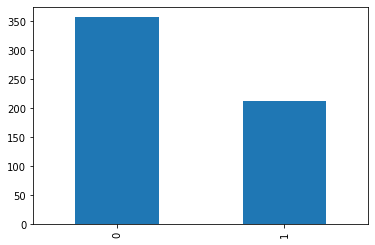

In [9]:
data['diagnosis'].value_counts().plot(kind='bar')

In [10]:
# pisahkan features dan target
x = data.drop(['diagnosis'], axis = 1) # features
y = data['diagnosis'] # target

In [11]:
# import modul train test split untuk memisahkan data train dan data test
# data train 80 % dan data test 20%
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [12]:
# import model Logistic Regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear',random_state=42)

# modelling
model.fit(x_train, y_train)

LogisticRegression(random_state=42, solver='liblinear')

In [13]:
# nilai koefisien
model.coef_

array([[-2.09622095e+00, -1.52986557e-01,  1.37869777e-01,
         8.77189914e-04,  1.37366267e-01,  4.09407751e-01,
         6.35928450e-01,  3.32564413e-01,  2.00652990e-01,
         2.95260565e-02,  4.47652500e-02, -1.43323303e+00,
         2.87043355e-01,  7.36301726e-02,  1.53082591e-02,
         6.56061518e-03,  4.79869662e-02,  3.66187433e-02,
         4.06224013e-02, -4.78127835e-03, -1.24564844e+00,
         4.03450822e-01,  4.11008543e-02,  2.69272017e-02,
         2.52802075e-01,  1.19719676e+00,  1.58803465e+00,
         5.96342103e-01,  7.16533818e-01,  1.16015458e-01]])

In [14]:
# nilai intercept
model.intercept_

array([-0.39912391])

In [15]:
# tampilkan koefisien setiap kolom
pd.DataFrame({
    'Coefficient' : model.coef_[0]
},index=data.iloc[:,1:].columns)

,Coefficient
radius_mean,-2.096221
texture_mean,-0.152987
perimeter_mean,0.137870
area_mean,0.000877
smoothness_mean,0.137366
compactness_mean,0.409408
concavity_mean,0.635928
concave points_mean,0.332564
symmetry_mean,0.200653
fractal_dimension_mean,0.029526


In [16]:
# predict
y_pred = model.predict(x_test)

In [17]:
# bandingkan data actual dan prediksi
compare = pd.DataFrame({
    'Actual' : y_test,
    'Prediction' : y_pred
}).reset_index()
compare

,index,Actual,Prediction
0,204,0,0
1,70,1,1
2,131,1,1
3,431,0,0
4,540,0,0
...,...,...,...
109,486,0,0
110,75,1,1
111,249,0,0
112,238,0,1


## Evaluation


In [18]:
from sklearn.metrics import confusion_matrix, classification_report

In [19]:
confusion_matrix(y_test,y_pred)

array([[70,  1],
       [ 4, 39]], dtype=int64)

Text(0.5, 15.0, 'Prediction')

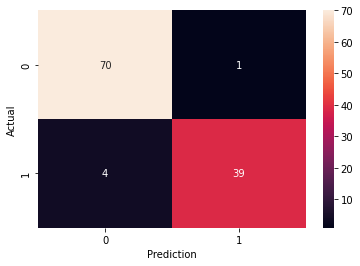

In [20]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)
plt.ylabel('Actual')
plt.xlabel('Prediction')

In [21]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97        71
           1       0.97      0.91      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

